In [26]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')


sns.set(font_scale=1.2)

print("Libraries imported successfully")

Libraries imported successfully


In [27]:
# Cell 2: Define data loading function
def load_imdb_from_local(data_path):
    """
    Load IMDb dataset from local
    """
    def load_split(split_path):
        texts = []
        labels = []
        
        # Load positive reviews
        pos_path = os.path.join(split_path, 'pos', '*.txt')
        for file_path in glob.glob(pos_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    texts.append(f.read())
                    labels.append(1)  # Positive label is 1
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
        
        # Load negative reviews
        neg_path = os.path.join(split_path, 'neg', '*.txt')
        for file_path in glob.glob(neg_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    texts.append(f.read())
                    labels.append(0)  # Negative label is 0
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
        
        return pd.DataFrame({'text': texts, 'label': labels})
    
    train_path = os.path.join(data_path, 'train')
    test_path = os.path.join(data_path, 'test')
    
    print("Loading training set...")
    train_df = load_split(train_path)
    print("Loading test set...")
    test_df = load_split(test_path)
    
    print(f"Training set shape: {train_df.shape}")
    print(f"Test set shape: {test_df.shape}")
    print(f"Training set label distribution:\n{train_df['label'].value_counts().sort_index()}")
    print(f"Test set label distribution:\n{test_df['label'].value_counts().sort_index()}")
    
    return train_df, test_df

In [28]:
# Cell 3: Define text cleaning function
def clean_text(text):
    """
    Lightweight text cleaning, preserving information needed by Transformer
    """
    if not isinstance(text, str):
        return ""
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove @ mentions
    text = re.sub(r'@\w+', '', text)
    # Merge extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

print(" Text cleaning function defined")

 Text cleaning function defined


In [29]:
# Cell 4: Load data
# Modify the path below to your actual IMDb dataset path
data_path = "aclImdb"  # If the dataset is in the aclImdb folder under the current directory

# Check if the path exists
if not os.path.exists(data_path):
    print(f"[ERROR] Path '{data_path}' does not exist, please check the dataset path")
    print("Current working directory:", os.getcwd())
    print("Directory contents:", os.listdir('.'))
else:
    train_df, test_df = load_imdb_from_local(data_path)
    print(" Data loading completed")

Loading training set...
Loading test set...
Training set shape: (25000, 2)
Test set shape: (25000, 2)
Training set label distribution:
label
0    12500
1    12500
Name: count, dtype: int64
Test set label distribution:
label
0    12500
1    12500
Name: count, dtype: int64
 Data loading completed


In [30]:
# Cell 5: Apply text cleaning
print("Starting text cleaning...")

# Apply cleaning to training and test sets
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

print(" Text cleaning completed")

# Display comparison before and after cleaning
print("\n Comparison before and after cleaning:")
print("=" * 80)
for i in range(3):
    print(f"\nSample {i+1} (Label: {'Positive' if train_df['label'].iloc[i] == 1 else 'Negative'}):")
    print(f"Original text: {train_df['text'].iloc[i][:100]}...")
    print(f"Cleaned text: {train_df['clean_text'].iloc[i][:100]}...")
    print(f"Length change: {len(train_df['text'].iloc[i])} → {len(train_df['clean_text'].iloc[i])} characters")
    print("-" * 80)

Starting text cleaning...
 Text cleaning completed

 Comparison before and after cleaning:

Sample 1 (Label: Positive):
Original text: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life,...
Cleaned text: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life,...
Length change: 806 → 806 characters
--------------------------------------------------------------------------------

Sample 2 (Label: Positive):
Original text: Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan...
Cleaned text: Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan...
Length change: 2366 → 2318 characters
--------------------------------------------------------------------------------

Sample 3 (Label: Positive):
Original text: Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love sc

In [31]:
# Cell 6: Basic statistical analysis
print(" Basic statistical analysis")
print("=" * 50)

# Calculate review length
train_df['length'] = train_df['clean_text'].apply(len)
test_df['length'] = test_df['clean_text'].apply(len)

# Statistics
print("Training set statistics:")
print(f"  Average length: {train_df['length'].mean():.2f} characters")
print(f"  Median length: {train_df['length'].median():.2f} characters")
print(f"  Longest review: {train_df['length'].max()} characters")
print(f"  Shortest review: {train_df['length'].min()} characters")

print("\nTest set statistics:")
print(f"  Average length: {test_df['length'].mean():.2f} characters")
print(f"  Median length: {test_df['length'].median():.2f} characters")
print(f"  Longest review: {test_df['length'].max()} characters")
print(f"  Shortest review: {test_df['length'].min()} characters")

# Statistics by sentiment
print("\nStatistics by sentiment (training set):")
for label in [0, 1]:
    label_data = train_df[train_df['label'] == label]['length']
    print(f"  Label {label} ({'Negative' if label == 0 else 'Positive'}): Average {label_data.mean():.2f} characters")

 Basic statistical analysis
Training set statistics:
  Average length: 1300.44 characters
  Median length: 962.00 characters
  Longest review: 13584 characters
  Shortest review: 52 characters

Test set statistics:
  Average length: 1269.62 characters
  Median length: 944.00 characters
  Longest review: 12690 characters
  Shortest review: 32 characters

Statistics by sentiment (training set):
  Label 0 (Negative): Average 1277.53 characters
  Label 1 (Positive): Average 1323.35 characters


 Data visualization


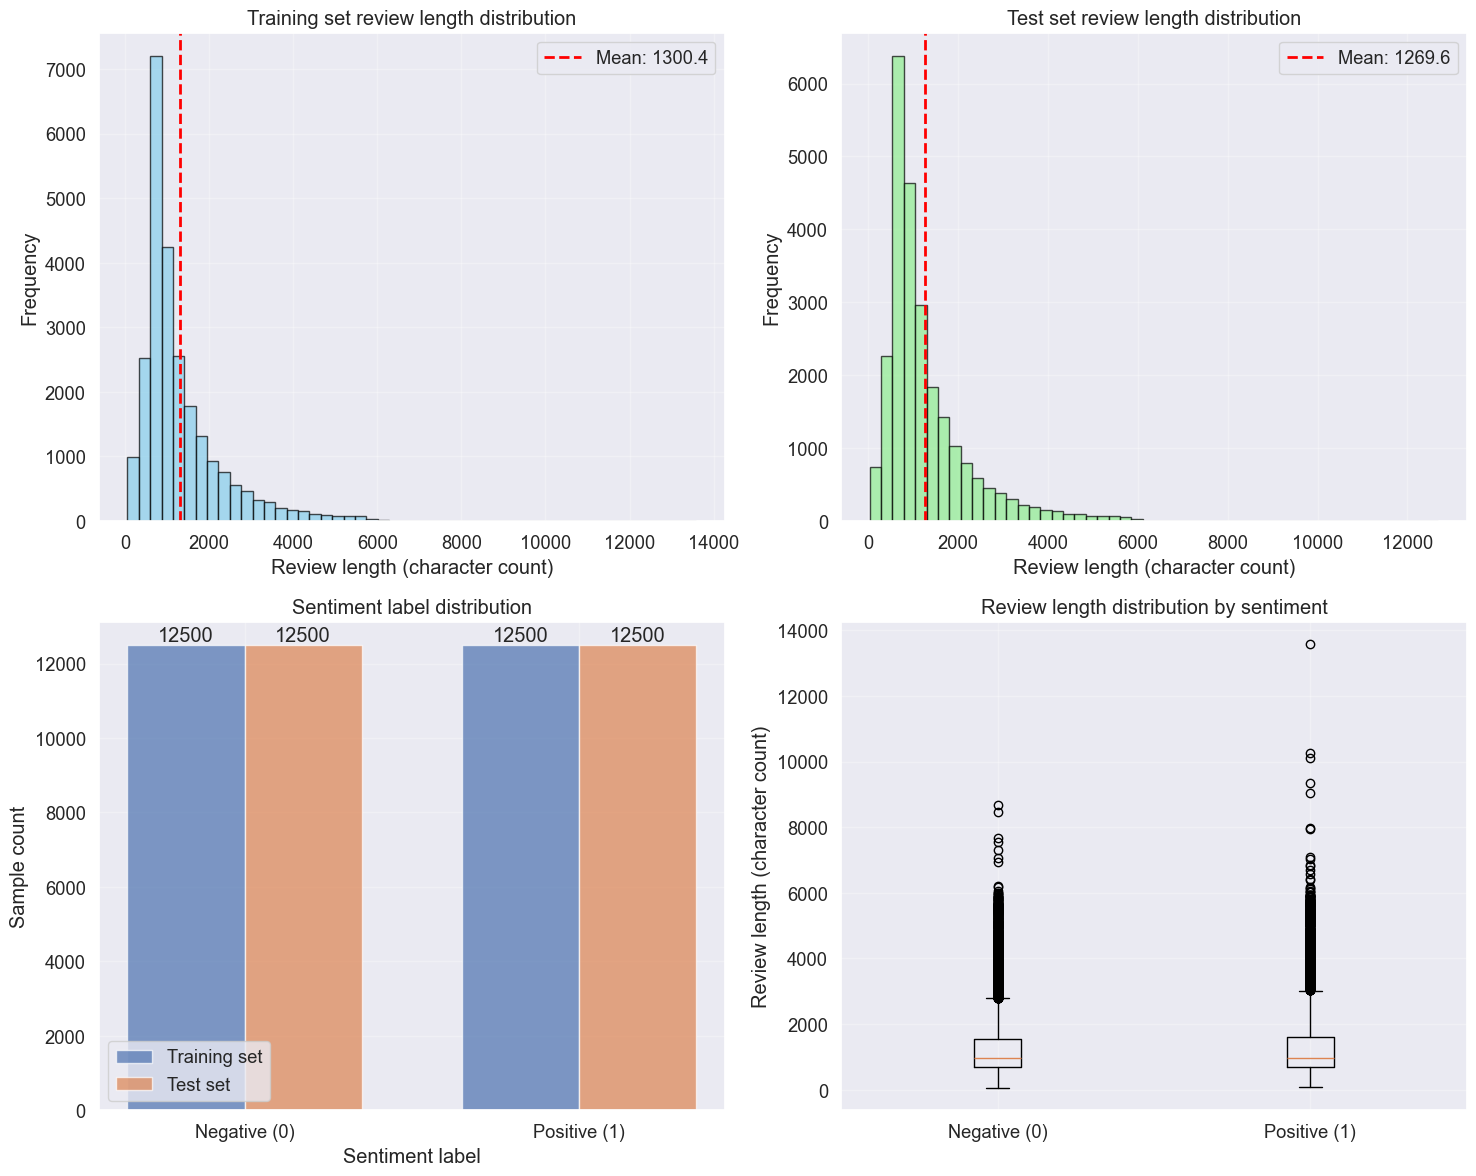

 Visualization completed


In [32]:
# Cell 7: Data visualization
print(" Data visualization")
print("=" * 50)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Training set length distribution
axes[0, 0].hist(train_df['length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(train_df['length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["length"].mean():.1f}')
axes[0, 0].set_xlabel('Review length (character count)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Training set review length distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Test set length distribution
axes[0, 1].hist(test_df['length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].axvline(test_df['length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {test_df["length"].mean():.1f}')
axes[0, 1].set_xlabel('Review length (character count)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Test set review length distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Sentiment label distribution
label_counts_train = train_df['label'].value_counts().sort_index()
label_counts_test = test_df['label'].value_counts().sort_index()

x = np.arange(2)
width = 0.35

axes[1, 0].bar(x - width/2, label_counts_train.values, width, label='Training set', alpha=0.7)
axes[1, 0].bar(x + width/2, label_counts_test.values, width, label='Test set', alpha=0.7)
axes[1, 0].set_xlabel('Sentiment label')
axes[1, 0].set_ylabel('Sample count')
axes[1, 0].set_title('Sentiment label distribution')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Negative (0)', 'Positive (1)'])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(label_counts_train.values):
    axes[1, 0].text(i - width/2, v + 100, str(v), ha='center')
for i, v in enumerate(label_counts_test.values):
    axes[1, 0].text(i + width/2, v + 100, str(v), ha='center')

# 4. Boxplot of review length by sentiment
box_data = [train_df[train_df['label'] == 0]['length'], 
            train_df[train_df['label'] == 1]['length']]
axes[1, 1].boxplot(box_data, labels=['Negative (0)', 'Positive (1)'])
axes[1, 1].set_ylabel('Review length (character count)')
axes[1, 1].set_title('Review length distribution by sentiment')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Visualization completed")

In [35]:
# Cell 8: Save processed data (optional)
save_processed = input("Save processed data? (y/n): ").lower().strip()
if save_processed == 'y':
    train_df.to_csv('imdb_train_processed.csv', index=False)
    test_df.to_csv('imdb_test_processed.csv', index=False)
    print(" Processed data saved as 'imdb_train_processed.csv' and 'imdb_test_processed.csv'")
else:
    print("[error] Data not saved")

print(" Data preprocessing check completed!")
print("\nNext steps recommended:")
print("1. Check data quality and cleaning effect")
print("2. Confirm data distribution meets expectations")
print("3. If satisfied, you can start model training")

 Processed data saved as 'imdb_train_processed.csv' and 'imdb_test_processed.csv'
 Data preprocessing check completed!

Next steps recommended:
1. Check data quality and cleaning effect
2. Confirm data distribution meets expectations
3. If satisfied, you can start model training


In [34]:
import tarfile
import urllib.request
from tqdm import tqdm

class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_imdb_dataset():

    url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

    # 压缩包文件名
    tar_filename = os.path.join(os.getcwd(), "aclImdb_v1.tar.gz")

    print(tar_filename)

    # 解压后的目录名
    extracted_dir = os.path.join(os.getcwd(), "aclImdb")

    # 检查数据集是否已经存在
    if os.path.exists(extracted_dir) and len(os.listdir(extracted_dir)) > 0:
        print(f"✅ IMDb数据集已存在于: {extracted_dir}")
        return extracted_dir

    if not os.path.exists(tar_filename):
        print('压缩包存在，但还未解压')
            # 下载数据集
        print("📥 下载IMDb数据集...")
        print(f"来源: {url}")
        print(f"目标: {tar_filename}")

        try:
            with DownloadProgressBar(unit='B', unit_scale=True, miniters=1, desc="下载进度") as t:
                urllib.request.urlretrieve(
                    url,
                    filename=tar_filename,
                    reporthook=t.update_to
                )
            print("✅ 下载完成!")
        except Exception as e:
            print(f"❌ 下载失败: {e}")
            # 清理可能下载失败的文件
            if os.path.exists(tar_filename):
                os.remove(tar_filename)
            return None


    # 解压数据集
    print("📦 解压数据集...")
    try:
        with tarfile.open(tar_filename, 'r:gz') as tar:
            # 显示解压进度
            members = tar.getmembers()
            for member in tqdm(members, desc="解压进度"):
                tar.extract(member, os.getcwd())

        print("✅ 解压完成!")

        # 验证解压结果
        if os.path.exists(extracted_dir):
            print(f"✅ 数据集已解压到: {extracted_dir}")

            # 统计文件数量
            train_pos = os.path.join(extracted_dir, "train", "pos")
            train_neg = os.path.join(extracted_dir, "train", "neg")
            test_pos = os.path.join(extracted_dir, "test", "pos")
            test_neg = os.path.join(extracted_dir, "test", "neg")

            counts = {
                "训练集正面": len(os.listdir(train_pos)) if os.path.exists(train_pos) else 0,
                "训练集负面": len(os.listdir(train_neg)) if os.path.exists(train_neg) else 0,
                "测试集正面": len(os.listdir(test_pos)) if os.path.exists(test_pos) else 0,
                "测试集负面": len(os.listdir(test_neg)) if os.path.exists(test_neg) else 0,
            }

            print("📊 数据集统计:")
            for category, count in counts.items():
                print(f"  {category}: {count} 个文件")

            # 清理压缩包以节省空间
            os.remove(tar_filename)
            print("🧹 已清理压缩包文件")

            return extracted_dir
        else:
            print("❌ 解压后未找到预期目录结构")
            return None

    except Exception as e:
        print(f"❌ 解压失败: {e}")
        return None

def check_imdb_structure(data_dir):
    """
    检查IMDb数据集目录结构是否正确

    Args:
        data_dir: 数据集目录

    Returns:
        bool: 目录结构是否正确
    """
    expected_dirs = [
        "train/pos",
        "train/neg",
        "test/pos",
        "test/neg",
        "train/unsup"  # 无标签数据
    ]

    for subdir in expected_dirs:
        full_path = os.path.join(data_dir, subdir)
        if not os.path.exists(full_path):
            print(f"❌ 缺少目录: {full_path}")
            return False
        if len(os.listdir(full_path)) == 0:
            print(f"⚠️  目录为空: {full_path}")
            return False

    print("✅ IMDb目录结构完整")
    return True

In [23]:
# 主函数
def main():
    """主函数：检查并下载IMDb数据集"""
    data_dir = os.getcwd()  # 你可以修改这个路径

    print("🔍 检查IMDb数据集...")

    # 检查数据集是否存在
    imdb_path = os.path.join(data_dir, "aclImdb")
    if os.path.exists(imdb_path) and check_imdb_structure(imdb_path):
        print(f"MDb数据集已准备就绪: {imdb_path}")
    else:
        print("📥 数据集不存在或结构不完整，开始下载...")
        downloaded_path = download_imdb_dataset()

        if downloaded_path and check_imdb_structure(downloaded_path):
            print(f"IMDb数据集准备完成: {downloaded_path}")
        else:
            print("❌ 数据集准备失败，请检查网络连接或手动下载")
            print("手动下载链接: https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz")

In [25]:
if __name__ == "__main__":
    main()

🔍 检查IMDb数据集...
📥 数据集不存在或结构不完整，开始下载...
T:\7015_NLP\SentimentAnalysis\aclImdb_v1.tar.gz
压缩包存在，但还未解压
📥 下载IMDb数据集...
来源: https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
目标: T:\7015_NLP\SentimentAnalysis\aclImdb_v1.tar.gz


下载进度: 84.1MB [00:27, 3.04MB/s]                              


✅ 下载完成!
📦 解压数据集...


解压进度: 100%|██████████| 100019/100019 [01:14<00:00, 1344.30it/s]

✅ 解压完成!
✅ 数据集已解压到: T:\7015_NLP\SentimentAnalysis\aclImdb
📊 数据集统计:
  训练集正面: 12500 个文件
  训练集负面: 12500 个文件
  测试集正面: 12500 个文件
  测试集负面: 12500 个文件
🧹 已清理压缩包文件
✅ IMDb目录结构完整
🎉 IMDb数据集准备完成: T:\7015_NLP\SentimentAnalysis\aclImdb

📄 样本文件预览:

训练集-正面 (前3个文件):
  0_9.txt: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life,...
  10000_8.txt: Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan...
  10001_10.txt: Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love scene...

训练集-负面 (前3个文件):
  0_3.txt: Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terri...
  10000_4.txt: Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belon...
  10001_4.txt: This film lacked something I couldn't put my finger on at first: charisma on the part of the leading...

测试集-正面 (前3个文件):
  0_10.txt: 